<a href="https://colab.research.google.com/github/haroldfox/ts-stuy-2019/blob/master/02_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd   
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import datetime

In [0]:
songs = pd.read_hdf('ts-stuy-2019/datasets/songs.h5')
song_date = pd.read_hdf('ts-stuy-2019/datasets/song_date.h5')
song_artist = pd.read_hdf('ts-stuy-2019/datasets/song_artist.h5')

In [4]:
artists = songs[['Artist', 'ArtistLink']].drop_duplicates()
artists.head()

,Artist,ArtistLink
0,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
1,Lil Uzi Vert,../artist/4O15NlyKLIASxsJ0PrXPfz.html
2,Kendrick Lamar,../artist/2YZyLoL8N0Wb9xBt1NhZWg.html
3,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
6,The Chainsmokers,../artist/69GGBxA162lTqCwzJG5jLp.html


In [5]:
songs.head()

,Artist,ArtistLink,Song,SongLink
0,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html,rockstar,../track/7wGoVu4Dady5GV0Sv4UIsx.html
1,Lil Uzi Vert,../artist/4O15NlyKLIASxsJ0PrXPfz.html,XO TOUR Llif3,../track/7GX5flRQZVHRAGd6B4TmDO.html
2,Kendrick Lamar,../artist/2YZyLoL8N0Wb9xBt1NhZWg.html,HUMBLE.,../track/7KXjTSCq5nL1LoYtL7XAwS.html
3,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html,God's Plan,../track/2XW4DbS6NddZxRPm5rMCeY.html
4,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html,One Dance,../track/1xznGGDReH1oQq0xzbwXa3.html


In [12]:
songs[songs['Track'] == 'Sober']

,Artist,ArtistLink,Track,TrackUrl
1405,G-Eazy,../artist/02kJSzxNuaWGqwubyUba0Z.html,Sober,../track/3qk4wRMDlaeagZGjSYbsOV.html
1763,Demi Lovato,../artist/6S2OmqARrzebs0tKUEyXyp.html,Sober,../track/0STK94RxUulYqWzwFlyAb5.html
1902,Childish Gambino,../artist/73sIBHcqh3Z3NyqHKZ7FOL.html,Sober,../track/6olUplztLFFfU7fMYmFXOP.html
2591,Lorde,../artist/163tK9Wjr9P9DmM0AVK7lm.html,Sober,../track/2mNbgyi0gori4b1rFSPgIb.html
2821,Selena Gomez,../artist/0C8ZW7ezQVs4URX5aX7Kqx.html,Sober,../track/3viZcRlE38APncWJ5VGM4q.html


In [6]:
song_date.head()

,Date,Streams,TrackUrl,Track
0,2017-09-21,17453592.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar
1,2017-09-28,19553820.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar
2,2017-10-05,18558660.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar
3,2017-10-12,17366836.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar
4,2017-10-19,18173497.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar


In [0]:
songs = songs.rename(columns={'Song': 'Track', 'SongLink': 'TrackUrl'})

In [9]:
songs.groupby('Track').count().sort_values('TrackUrl', ascending=False).head(10)

,Artist,ArtistLink,TrackUrl
Track,,,
Sober,5,5,5
White Christmas,5,5,5
Sleigh Ride,4,4,4
Stay,4,4,4
Intro,4,4,4
X,4,4,4
Secrets,4,4,4
Famous,4,4,4
Sorry,4,4,4


In [22]:
song_streams = song_date.groupby(['Track', 'TrackUrl'], as_index=False)[['Streams']].sum()
song_streams.sort_values('Streams', ascending=False).head(20)

,Track,TrackUrl,Streams
3960,rockstar,../track/7wGoVu4Dady5GV0Sv4UIsx.html,526568911.0
3819,XO TOUR Llif3,../track/7GX5flRQZVHRAGd6B4TmDO.html,500942651.0
1375,HUMBLE.,../track/7KXjTSCq5nL1LoYtL7XAwS.html,494041788.0
1314,God's Plan,../track/2XW4DbS6NddZxRPm5rMCeY.html,484983076.0
2457,One Dance,../track/1xznGGDReH1oQq0xzbwXa3.html,456343099.0
738,Congratulations,../track/3a1lNhkSLSkpJE4MSHpDu9.html,451833377.0
691,Closer,../track/7BKLCZ1jbUBVqRi2FVlTVw.html,404877134.0
2808,SAD!,../track/3ee8Jmje8o58CHK66QrVC2.html,383011211.0
3925,goosebumps,../track/6gBFPUFcJLzWGx4lenP6h2.html,359510103.0
1989,Location,../track/152lZdxL1OR0ZMW6KquMif.html,354114515.0


In [15]:
top_by_date = song_date.sort_values(['Date', 'Streams'], ascending=(True, False)).groupby('Date').head(1)
top_by_date

,Date,Streams,TrackUrl,Track
0,2013-04-28,1776611.0,../track/2Foc5Q5nqNiosCNqttzHof.html,Get Lucky
1,2013-05-05,1847611.0,../track/3bidbhpOYeV4knp8AIu8Xn.html,Can't Hold Us
2,2013-05-12,1790001.0,../track/3bidbhpOYeV4knp8AIu8Xn.html,Can't Hold Us
3,2013-05-19,1709270.0,../track/3bidbhpOYeV4knp8AIu8Xn.html,Can't Hold Us
4,2013-05-26,2331989.0,../track/2Foc5Q5nqNiosCNqttzHof.html,Get Lucky
5,2013-06-02,2267539.0,../track/2Foc5Q5nqNiosCNqttzHof.html,Get Lucky
6,2013-06-09,2055810.0,../track/2Foc5Q5nqNiosCNqttzHof.html,Get Lucky
7,2013-06-16,1952438.0,../track/2Foc5Q5nqNiosCNqttzHof.html,Get Lucky
0,2013-06-23,3333228.0,../track/6g1NlCpW7fgqDnWbCCDrHl.html,Wake Me Up
1,2013-06-30,3716728.0,../track/6g1NlCpW7fgqDnWbCCDrHl.html,Wake Me Up


In [0]:
song_streams = pd.merge(song_streams, songs[['TrackUrl', 'Artist', 'ArtistLink']], on='TrackUrl')

In [24]:
song_streams.sort_values('Streams', ascending=False).head(20)

,Track,TrackUrl,Streams,Artist,ArtistLink
3960,rockstar,../track/7wGoVu4Dady5GV0Sv4UIsx.html,526568911.0,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
3819,XO TOUR Llif3,../track/7GX5flRQZVHRAGd6B4TmDO.html,500942651.0,Lil Uzi Vert,../artist/4O15NlyKLIASxsJ0PrXPfz.html
1375,HUMBLE.,../track/7KXjTSCq5nL1LoYtL7XAwS.html,494041788.0,Kendrick Lamar,../artist/2YZyLoL8N0Wb9xBt1NhZWg.html
1314,God's Plan,../track/2XW4DbS6NddZxRPm5rMCeY.html,484983076.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
2457,One Dance,../track/1xznGGDReH1oQq0xzbwXa3.html,456343099.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
738,Congratulations,../track/3a1lNhkSLSkpJE4MSHpDu9.html,451833377.0,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
691,Closer,../track/7BKLCZ1jbUBVqRi2FVlTVw.html,404877134.0,The Chainsmokers,../artist/69GGBxA162lTqCwzJG5jLp.html
2808,SAD!,../track/3ee8Jmje8o58CHK66QrVC2.html,383011211.0,XXXTENTACION,../artist/15UsOTVnJzReFVN1VCnxy4.html
3925,goosebumps,../track/6gBFPUFcJLzWGx4lenP6h2.html,359510103.0,Travis Scott,../artist/0Y5tJX1MQlPlqiwlOH1tJY.html
1989,Location,../track/152lZdxL1OR0ZMW6KquMif.html,354114515.0,Khalid,../artist/6LuN9FCkKOj5PcnpouEgny.html


In [0]:
top_by_date = pd.merge(top_by_date, songs[['TrackUrl', 'Artist']], on='TrackUrl')

In [19]:
top_by_date.tail(60)

,Date,Streams,TrackUrl,Track,Artist
241,2018-01-11,9855305.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,Post Malone
242,2018-01-18,9029173.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,Post Malone
243,2018-01-25,26345370.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
244,2018-02-01,28708450.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
245,2018-02-08,24209854.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
246,2018-02-15,22071986.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
247,2018-02-22,23813466.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
248,2018-03-01,23327237.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
249,2018-03-08,20829362.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake
250,2018-03-15,18577161.0,../track/2XW4DbS6NddZxRPm5rMCeY.html,God's Plan,Drake


In [26]:
artist_streams = song_streams.groupby(['Artist', 'ArtistLink'], as_index=False)[['Streams']].sum()
artist_streams.sort_values('Streams', ascending=False).head(20)

,Artist,ArtistLink,Streams
209,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html,6.113544e+09
601,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html,3.806344e+09
781,XXXTENTACION,../artist/15UsOTVnJzReFVN1VCnxy4.html,2.614651e+09
722,The Weeknd,../artist/1Xyo4u8uXC1ZmMpatF05PJ.html,2.154281e+09
385,Kendrick Lamar,../artist/2YZyLoL8N0Wb9xBt1NhZWg.html,1.884075e+09
49,Ariana Grande,../artist/66CXWjxzNUsdJxJ2JdwvnR.html,1.808600e+09
222,Ed Sheeran,../artist/6eUKZXaKkcviH0Ku9w2n3V.html,1.564102e+09
747,Travis Scott,../artist/0Y5tJX1MQlPlqiwlOH1tJY.html,1.544492e+09
708,The Chainsmokers,../artist/69GGBxA162lTqCwzJG5jLp.html,1.508529e+09
502,Migos,../artist/6oMuImdp5ZcFhWP0ESe6mG.html,1.391708e+09


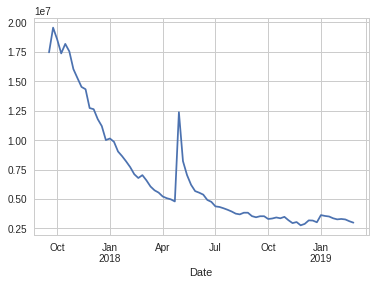

In [29]:
song_date[song_date['Track'] == 'rockstar'].set_index('Date')['Streams'].plot()

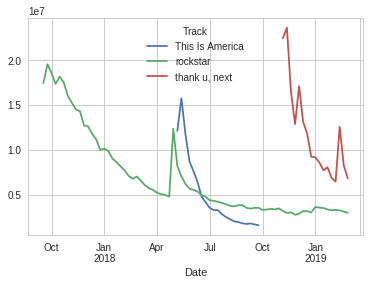

In [32]:
song_date[song_date['Track'].isin(['rockstar', 'thank u, next', 'This Is America'])].pivot('Date', 'Track', 'Streams').plot()

In [0]:
song_date['Month'] = song_date['Date'].dt.to_period('M')

In [38]:
song_date[song_date['Month'].dt.year == 2018].tail(60)

,Date,Streams,TrackUrl,Track,Month
113,2018-04-12,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-04
114,2018-04-19,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-04
115,2018-04-26,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-04
116,2018-05-03,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-05
117,2018-05-10,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-05
118,2018-05-17,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-05
119,2018-05-24,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-05
120,2018-05-31,355736.0,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-05
121,2018-06-07,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-06
122,2018-06-14,NaN,../track/6Qyc6fS4DsZjB2mRW9DsQs.html,Iris,2018-06


In [0]:
song_month = song_date.groupby(['Track', 'TrackUrl', 'Month'], as_index=False)[['Streams']].sum()

In [0]:
top_by_month = song_month.sort_values(['Month', 'Streams'], ascending=(True, False)).groupby('Month', as_index=False).head(1)

In [0]:
top_by_month = pd.merge(top_by_month, songs[['Artist', 'TrackUrl', 'ArtistLink']], on=['TrackUrl'])

In [45]:
top_by_month[top_by_month['Month'].dt.year == 2018]

,Track,TrackUrl,Month,Streams,Artist,ArtistLink
57,rockstar,../track/7wGoVu4Dady5GV0Sv4UIsx.html,2018-01,37653990.0,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
58,God's Plan,../track/2XW4DbS6NddZxRPm5rMCeY.html,2018-02,98803756.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
59,God's Plan,../track/2XW4DbS6NddZxRPm5rMCeY.html,2018-03,95601590.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
60,Nice For What,../track/1cTZMwcBJT0Ka3UJPXOeeN.html,2018-04,55911864.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
61,Better Now,../track/7dt6x5M1jzdTEt8oCbisTK.html,2018-05,67188971.0,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
62,Lucid Dreams,../track/0s3nnoMeVWz3989MkNQiRf.html,2018-06,52746674.0,Juice WRLD,../artist/4MCBfE4596Uoi2O4DtmEMz.html
63,In My Feelings,../track/2G7V7zsVDxg1yRsu7Ew9RJ.html,2018-07,95448936.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
64,In My Feelings,../track/2G7V7zsVDxg1yRsu7Ew9RJ.html,2018-08,72081413.0,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html
65,Lucky You,../track/60SdxE8apGAxMiRrpbmLY0.html,2018-09,44599191.0,Eminem,../artist/7dGJo4pcD2V6oG8kP0tJRR.html
66,SICKO MODE,../track/2xLMifQCjDGFmkHkpNLD9h.html,2018-10,38410631.0,Travis Scott,../artist/0Y5tJX1MQlPlqiwlOH1tJY.html


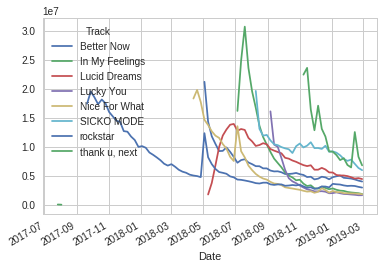

In [46]:
song_date[song_date['Track'].isin(['rockstar', "GOd's Plan", 'Nice For What', 'Better Now', 'Lucid Dreams', 'In My Feelings', 'Lucky You', 'SICKO MODE', 'thank u, next'])].pivot('Date', 'Track', 'Streams').plot()

In [0]:
song_date = pd.merge(song_date, songs[['Artist', 'ArtistLink', 'TrackUrl']], on='TrackUrl')

In [49]:
song_date.head()

,Date,Streams,TrackUrl,Track,Month,Artist,ArtistLink
0,2017-09-21,17453592.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-09,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
1,2017-09-28,19553820.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-09,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
2,2017-10-05,18558660.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-10,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
3,2017-10-12,17366836.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-10,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html
4,2017-10-19,18173497.0,../track/7wGoVu4Dady5GV0Sv4UIsx.html,rockstar,2017-10,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html


In [0]:
artist_date = song_date.groupby(['Date', 'Artist', 'ArtistLink'], as_index=False)[['Streams']].sum()

In [0]:
top_artist = artist_date.sort_values(['Date', 'Streams'], ascending=(True, False)).groupby('Date', as_index=False).head(1)

In [52]:
top_artist.tail(60)

,Date,Artist,ArtistLink,Streams
42083,2018-01-11,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html,30606271.0
42171,2018-01-18,Camila Cabello,../artist/4nDoRrQiYLoBzwC5BhVJzF.html,31082632.0
42428,2018-01-25,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html,41579098.0
42747,2018-02-01,Migos,../artist/6oMuImdp5ZcFhWP0ESe6mG.html,78699870.0
42972,2018-02-08,Migos,../artist/6oMuImdp5ZcFhWP0ESe6mG.html,42292398.0
43165,2018-02-15,Kendrick Lamar,../artist/2YZyLoL8N0Wb9xBt1NhZWg.html,34487417.0
43352,2018-02-22,Drake,../artist/3TVXtAsR1Inumwj472S9r4.html,32434467.0
43705,2018-03-01,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html,50891990.0
43945,2018-03-08,Post Malone,../artist/246dkjvS1zLTtiykXe5h60.html,41507560.0
44138,2018-03-15,Logic,../artist/4xRYI6VqpkE3UwrDrAZL8L.html,72930914.0
